# Data Preparation and EDA for IoT23 dataset

In [1]:
import os 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
from numpy import array
from numpy import argmax
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
data= pd.read_csv('clean_data_new.csv', low_memory=False)

In [3]:
del data['Unnamed: 0']

# dropping unncessary attributes ! 

In [4]:
df=data

In [5]:
df.head()

,ts,id.orig_p,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.536227e+09,17832.0,37215.0,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
1,1.536227e+09,17832.0,37215.0,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
2,1.536227e+09,17832.0,37215.0,tcp,-,6000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
3,1.536227e+09,17832.0,37215.0,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru
4,1.536227e+09,17832.0,37215.0,tcp,-,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,Okiru


In [6]:
df.shape

(884228, 16)

In [7]:
df=df.drop(['ts','id.orig_p','id.resp_p'],axis=1) 

Let us separate the target and independent variables 

okkkk... so there are 7 target variables with very few samples.. we would like to remove all those 

In [119]:
df.drop(df[df['label'] == 'C&C-HeartBeat' ].index, inplace = True)

In [120]:
df.drop(df[df['label'] == 'Attack' ].index, inplace = True)

In [121]:
df.drop(df[df['label'] == 'C&C-FileDownload' ].index, inplace = True)

In [122]:
df.drop(df[df['label'] == 'C&C-Mirai' ].index, inplace = True)

In [123]:
df.drop(df[df['label'] == 'C&C-HeartBeat-FileDownload' ].index, inplace = True)

In [124]:
df.drop(df[df['label'] == 'FileDownload' ].index, inplace = True)

In [125]:
df.drop(df[df['label'] == 'C&C-Torii' ].index, inplace = True)

In [8]:
df.isnull().sum()

proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64

In [9]:
df.shape

(884228, 13)

# total (target labels) attacks types and value counts

In [16]:
df['label'].value_counts()

POHS                          366901
Okiru                         238184
Benign                        149526
DDoS                          114138
C&C                            15051
C&C-HeartBeat                    337
C&C-FileDownload                  33
C&C-Torii                         30
Attack                            18
C&C-HeartBeat-FileDownload         8
FileDownload                       2
Name: label, dtype: int64

Separating dependent and independent variables

In [17]:
X= df.iloc[:,:-1]

In [18]:
Y=df['label']

In [19]:
X.shape

(884228, 12)

In [20]:
Y.unique()

array(['Okiru', 'POHS', 'DDoS', 'Benign', 'C&C-Torii', 'C&C-HeartBeat',
       'C&C', 'C&C-FileDownload', 'FileDownload',
       'C&C-HeartBeat-FileDownload', 'Attack'], dtype=object)

In [21]:
cat_df =X.select_dtypes(include=['object']).copy()
cat_df.head()

,proto,service,conn_state,history
0,tcp,-,S0,S
1,tcp,-,S0,S
2,tcp,-,S0,S
3,tcp,-,S0,S
4,tcp,-,S0,S


In [22]:
num_df =X.select_dtypes(exclude=['object']).copy()
num_df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0
1,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0
2,6000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0
3,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0
4,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0


In [23]:
encode_all_cat =cat_df.apply(LabelEncoder().fit_transform)

In [24]:
encoded_data =pd.concat([num_df,encode_all_cat], axis=1)

In [25]:
X=encoded_data

In [26]:
le=LabelEncoder()

In [27]:
Y=le.fit_transform(Y)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaling=StandardScaler()

In [30]:
X_t=scaling.fit_transform(X)

In [31]:
X_t

array([[ 3.36854028e+00, -2.03035169e-03, -1.77944098e-03, ...,
        -8.08086667e-02,  3.39088800e-01,  2.98535387e-01],
       [ 3.36854028e+00, -2.03035169e-03, -1.77944098e-03, ...,
        -8.08086667e-02,  3.39088800e-01,  2.98535387e-01],
       [ 1.04115606e+01, -2.03035169e-03, -1.77944098e-03, ...,
        -8.08086667e-02,  3.39088800e-01,  2.98535387e-01],
       ...,
       [-1.52969853e-01, -2.03035169e-03, -1.77944098e-03, ...,
        -8.08086667e-02,  3.39088800e-01,  2.98535387e-01],
       [-1.52969853e-01, -2.03035169e-03, -1.77944098e-03, ...,
        -8.08086667e-02,  3.39088800e-01,  2.98535387e-01],
       [-1.52969853e-01, -2.03035169e-03, -1.77944098e-03, ...,
        -8.08086667e-02,  3.39088800e-01,  2.98535387e-01]])

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
import time as timer

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X_t, Y, random_state=100, test_size=0.20)

# Gussian Naive Bayes 

In [34]:
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 0.38 seconds


In [35]:
# Predicting the test set results
y_gnb = gnb_model.predict(X_test)
y_gnb_prob = gnb_model.predict_proba(X_test)

In [36]:
print("Classification report for GNB: \n{}".format(classification_report(Y_test,y_gnb)))
print("Confusion matrix for GNB: \n{}".format(confusion_matrix(Y_test,y_gnb)))
print("Accuracy score for GNB: {:.2f}".format(accuracy_score(Y_test,y_gnb)))
# calculate precision, recall, and f1 scores
prec_gnb = precision_score(Y_test,y_gnb,average='weighted')
rec_gnb = recall_score(Y_test,y_gnb,average='weighted')
f1_gnb = f1_score(Y_test,y_gnb,average='weighted')
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\

Classification report for GNB: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.10      0.19     29687
           2       0.99      0.11      0.20      3071
           3       0.33      0.75      0.46         4
           4       0.00      0.52      0.00        71
           5       0.80      1.00      0.89         4
           6       0.21      0.38      0.27         8
           7       0.33      0.00      0.00     22816
           8       0.00      0.00      0.00         1
           9       0.36      1.00      0.53     47483
          10       0.41      0.10      0.16     73697

    accuracy                           0.33    176846
   macro avg       0.40      0.36      0.25    176846
weighted avg       0.49      0.33      0.25    176846

Confusion matrix for GNB: 
[[    0     0     0     0     4     0     0     0     0     0     0]
 [  181  3052     3     5    29     0     4     4     0 164

# Logistic Regression 

In [369]:
start = timer.time()
logit_model = LogisticRegression(solver='sag', max_iter=1000, multi_class='multinomial')
logit_model.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 961.78 seconds


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [371]:
# Predicting the test set results
y_logit = logit_model.predict(X_test)
y_logit_prob = logit_model.predict_proba(X_test)

In [372]:
print("Classification report for LR: \n{}".format(classification_report(Y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(Y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(Y_test,y_logit)))
# calculate precision, recall, and f1 scores
prec_logit = precision_score(Y_test,y_logit,average='weighted')
rec_logit = recall_score(Y_test,y_logit,average='weighted')
f1_logit = f1_score(Y_test,y_logit,average='weighted')
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for LR: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.44      0.26      0.33     29687
           2       0.98      0.11      0.20      3071
           3       0.60      0.75      0.67         4
           4       0.00      0.00      0.00        71
           5       0.00      0.00      0.00         4
           6       1.00      0.38      0.55         8
           7       1.00      1.00      1.00     22816
           8       0.00      0.00      0.00         1
           9       0.57      0.46      0.51     47483
          10       0.49      0.64      0.55     73697

    accuracy                           0.57    176846
   macro avg       0.46      0.33      0.35    176846
weighted avg       0.58      0.57      0.55    176846

Confusion matrix for LR: 
[[    0     4     0     0     0     0     0     0     0     0     0]
 [    0  7715     8     2     3     0     0    44     0    23

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [209]:
cf=confusion_matrix(Y_test,y_logit)

In [210]:
 from sklearn.metrics import plot_confusion_matrix

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


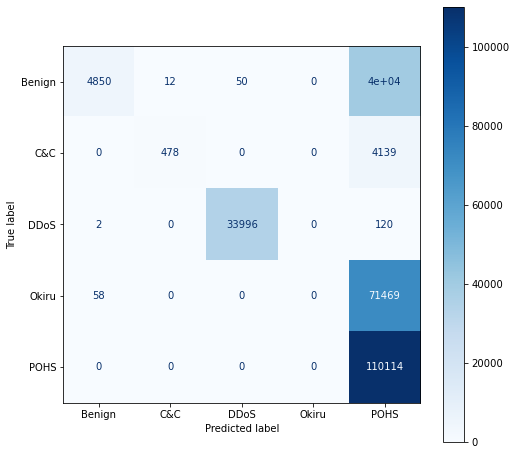

In [213]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(logit_model, X_test, Y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

In [219]:
RandomForestClassifier?

In [135]:
start = timer.time()
Rf_clf=RandomForestClassifier(n_estimators = 200, criterion = 'gini', random_state = 0)
Rf_clf.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 535.40 seconds


In [214]:
y_RF = Rf_clf.predict(X_test)
y_RF_prob = Rf_clf.predict_proba(X_test)

In [215]:
print("Classification report for RF: \n{}".format(classification_report(Y_test,y_RF)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(Y_test,y_RF)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(Y_test,y_RF)))
# calculate precision, recall, and f1 scores
prec_rf = precision_score(Y_test,y_RF, average='micro')
rec_rf = recall_score(Y_test,y_RF,average='micro')
f1_rf = f1_score(Y_test,y_RF,average='micro')

Classification report for RF: 
              precision    recall  f1-score   support

      Benign       0.89      0.78      0.83     44764
         C&C       1.00      0.10      0.19      4617
        DDoS       1.00      1.00      1.00     34118
       Okiru       0.74      0.00      0.00     71527
        POHS       0.58      1.00      0.73    110114

    accuracy                           0.68    265140
   macro avg       0.84      0.58      0.55    265140
weighted avg       0.74      0.68      0.58    265140

Confusion matrix for RF: 
[[ 35000      0      1     18   9745]
 [  4139    478      0      0      0]
 [     1      0  33998      0    119]
 [     4      0      0     55  71468]
 [    10      0      0      1 110103]]
Accuracy score for RF: 0.68


In [216]:
cf=confusion_matrix(Y_test,y_RF)

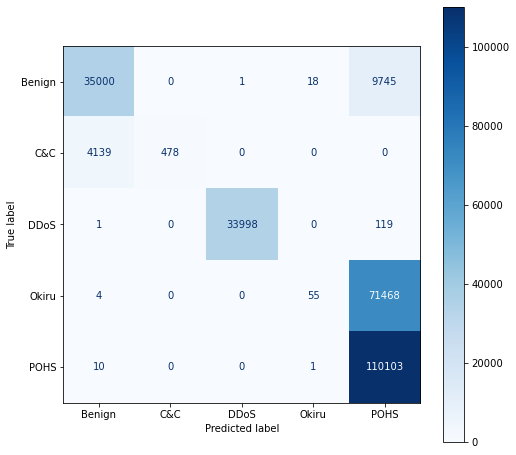

In [218]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(Rf_clf, X_test, Y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

# Decision Tree

In [37]:
start = timer.time()
DT_clf= DecisionTreeClassifier()
DT_clf.fit(X_train,Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 0.93 seconds


In [38]:
y_DT = DT_clf.predict(X_test)
y_DT_prob = DT_clf.predict_proba(X_test)

In [39]:
print("Classification report for DT: \n{}".format(classification_report(Y_test,y_DT)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(Y_test,y_DT)))
print("Accuracy score for DT: {:.2f}".format(accuracy_score(Y_test,y_DT)))

# calculate precision, recall, and f1 scores
prec_dt = precision_score(Y_test,y_DT, average='micro')
rec_dt = recall_score(Y_test,y_DT, average='micro')
f1_dt = f1_score(Y_test,y_DT, average='micro')
print("Precision score for DT: {:.2f}".format(prec_dt))
print("Recall score for DT: {:.2f}".format(rec_dt))
print("F1 score for RF: {:.2f}".format(f1_dt))


Classification report for DT: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.89      0.78      0.83     29687
           2       1.00      0.11      0.20      3071
           3       1.00      1.00      1.00         4
           4       0.88      0.52      0.65        71
           5       0.67      1.00      0.80         4
           6       1.00      0.38      0.55         8
           7       1.00      1.00      1.00     22816
           8       1.00      1.00      1.00         1
           9       0.69      0.00      0.00     47483
          10       0.58      1.00      0.73     73697

    accuracy                           0.68    176846
   macro avg       0.88      0.66      0.68    176846
weighted avg       0.72      0.68      0.58    176846

Confusion matrix for DT: 
[[    2     0     0     0     2     0     0     0     0     0     0]
 [    0 23216     0     0     2     2     0     4     0    15

# checking model training and testing curve 

In [40]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]

In [41]:
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.543, test: 0.545
>2, train: 0.632, test: 0.633
>3, train: 0.663, test: 0.664
>4, train: 0.673, test: 0.675
>5, train: 0.675, test: 0.677
>6, train: 0.677, test: 0.678
>7, train: 0.677, test: 0.679
>8, train: 0.678, test: 0.679
>9, train: 0.678, test: 0.679
>10, train: 0.678, test: 0.679
>11, train: 0.678, test: 0.679
>12, train: 0.678, test: 0.679
>13, train: 0.678, test: 0.679
>14, train: 0.678, test: 0.679
>15, train: 0.678, test: 0.679
>16, train: 0.678, test: 0.679
>17, train: 0.678, test: 0.679
>18, train: 0.678, test: 0.679
>19, train: 0.678, test: 0.679
>20, train: 0.678, test: 0.679


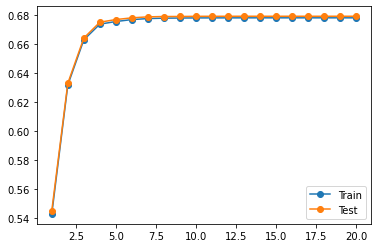

In [42]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [155]:
pip install mlextend

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mlextend (from versions: none)
ERROR: No matching distribution found for mlextend


In [154]:
from mlxtend.evaluate import bias_variance_decomp

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)